In [1]:
from __future__ import division, print_function

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import numpy.ma as ma
import glob
import matplotlib.colors as colors
from IPython.display import display, Math, Latex

from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
import warnings

from salishsea_tools import (
    nc_tools,
    viz_tools,
)
import map

%matplotlib inline

In [6]:
def plot_arctic(ax,zonal_var,ticks=None,log=False, sym=False,diffplot=False,min_log=None,max_scale=None):
    
    '''
    zonal_var = zonal variable that is 50X800
    min_log = either the minimum value in log or the smallest log on positive or negative magnitude in symlog
    max_scale = max value of variable
    title = title of the contour plot
    ticks = optional variable that can contain a list of ticks for the colorbar
    sym = if set to true the symlog scale will be used to account for positive and negative values
    
    '''
    
    m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True',ax=ax)
    m.drawcoastlines()
    m.fillcontinents(color = '0.85',alpha=0.5)
    m.drawparallels(np.arange(-90.,90.,20.),labels=[0, 0, 0, 0])
    x_lon,y_lat=m(nav_lon[300:,:],nav_lat[300:,:])
    vmax = 10**(-15)

    
    x = np.arange(0,500)
    y = np.arange(0,544)
    X, Y = np.meshgrid(x[:], y[:])
    
    cmap = plt.get_cmap('inferno',25)
    #cmap.set_bad('burlywood')
    cmap.set_over(color='grey')

    if log == True:
        cmap = plt.get_cmap('seismic',25)
        cmap.set_bad('burlywood')
        cmap.set_over(color='grey')
        minimum_log_level = min_log
        maximum_scale_level = max_scale
        norm = colors.LogNorm(vmin=minimum_log_level,
                                 vmax=maximum_scale_level)
        
        m.pcolor(x_lon,y_lat,zonal_var[:,:],cmap=cmap,norm=norm)
        
        
    elif sym == True:
        minimum_log_level = min_log
        maximum_scale_level = max_scale
        norm = colors.SymLogNorm(vmin=-maximum_scale_level,
                                 vmax=maximum_scale_level,linthresh=minimum_log_level,linscale=0)
        cmap = plt.get_cmap('seismic',25)
        cmap.set_bad('burlywood')
        m.pcolor(x_lon,y_lat,zonal_var[:,:],cmap=cmap,norm=norm)
        
    elif diffplot==True:
        cmap = plt.get_cmap('seismic',25)
        cmap.set_bad('burlywood')
        cmap.set_over(color='grey')
        m.pcolor(x_lon,y_lat,zonal_var[:,:],cmap=cmap, vmin=min_log, vmax=max_scale)
    else:
        if min_log != None:
            m.pcolor(x_lon,y_lat,zonal_var[:,:],cmap=cmap,vmin=min_log, vmax=max_scale)
            
        else:
    
            m.pcolor(x_lon,y_lat,zonal_var[:,:],cmap=cmap)
   
    #ax.set_title('{d:.0f} m'.format(d=zlevels[depth]))

    
    return mesh

In [7]:
mesh = nc.Dataset('/mnt/storage0/jacquielee/research/data/Jasper/mesh_mask_anha4_201509.nc')
mask = mesh.variables['tmask'][0]
mbathy = ma.array(mesh.variables['mbathy'][0],mask=(mask[0,:,:]-1)*-1)
nav_lat=mesh.variables['nav_lat']
nav_lon=mesh.variables['nav_lon']

In [11]:
grid = nc.Dataset(control+'y2002m01d05_icemod.nc')
grid.variables

OrderedDict([(u'nav_lon', <type 'netCDF4._netCDF4.Variable'>
              float32 nav_lon(y, x)
                  units: degrees_east
                  valid_min: -179.997
                  valid_max: 180.0
                  long_name: Longitude
                  nav_model: Default grid
              unlimited dimensions: 
              current shape = (800, 544)
              filling on, default _FillValue of 9.96920996839e+36 used),
             (u'nav_lat', <type 'netCDF4._netCDF4.Variable'>
              float32 nav_lat(y, x)
                  units: degrees_north
                  valid_min: -20.0761
                  valid_max: 89.9479
                  long_name: Latitude
                  nav_model: Default grid
              unlimited dimensions: 
              current shape = (800, 544)
              filling on, default _FillValue of 9.96920996839e+36 used),
             (u'deptht', <type 'netCDF4._netCDF4.Variable'>
              float32 deptht(deptht)
                  uni

In [9]:
#state locations of output
control = '/mnt/storage0/xhu/NEMO/ANHA4-EXH005/ANHA4-EXH005_'
control_storage = '/mnt/storage0/jacquielee/research/data/ANHA4-EXH005/ANHA4-EXH005_'
stlandj = '/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_'
polzin  = '/mnt/storage0/jacquielee/research/data/ANHA4-VJT003/ANHA4-VJT003_'

/home/jacquielee/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/jacquielee/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/jacquielee/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/jacquielee/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


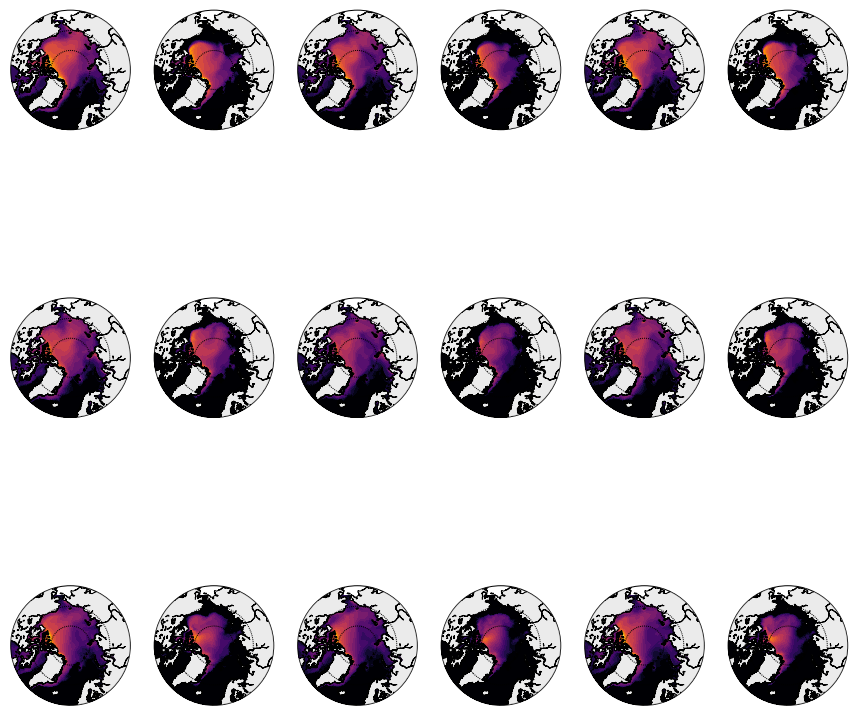

In [12]:
fig, axes = plt.subplots(3, 6, figsize=(15,15))

years=['2007','2011','2015']
#filename = glob.glob(polzin+'avg_iicethic_y201?_m03.nc')

for axis, year in zip(axes[:],years[:]):
    sj_M = ma.array(nc.Dataset(stlandj+'avg_iicethic_y'+year+'_m03.nc')['iicethic'][300:,:],mask=(mask[0,300:,:]-1)*-1)
    p_M = ma.array(nc.Dataset(polzin+'avg_iicethic_y'+year+'_m03.nc')['iicethic'][300:,:],mask=(mask[0,300:,:]-1)*-1)
    c_M= ma.array(nc.Dataset(control_storage+'avg_iicethic_y'+year+'_m03.nc')['iicethic'][300:,:],mask=(mask[0,300:,:]-1)*-1)
    
    sj_S = ma.array(nc.Dataset(stlandj+'avg_iicethic_y'+year+'_m09.nc')['iicethic'][300:,:],mask=(mask[0,300:,:]-1)*-1)
    p_S = ma.array(nc.Dataset(polzin+'avg_iicethic_y'+year+'_m09.nc')['iicethic'][300:,:],mask=(mask[0,300:,:]-1)*-1)
    c_S= ma.array(nc.Dataset(control_storage+'avg_iicethic_y'+year+'_m09.nc')['iicethic'][300:,:],mask=(mask[0,300:,:]-1)*-1)
   
    #     diff = sj-p
#     percent = np.divide(sj,p)
#     ratio = np.divide(diff,p)
    sjm = plot_arctic(axis[0],c_M,min_log = 0, max_scale=6.5)
    pm = plot_arctic(axis[1],c_S,min_log = 0, max_scale=6.5)
    sjm = plot_arctic(axis[2],sj_M,min_log = 0, max_scale=6.5)
    pm = plot_arctic(axis[3],sj_S,min_log = 0, max_scale=6.5)
    sjm = plot_arctic(axis[4],p_M,min_log = 0, max_scale=6.5)
    pm = plot_arctic(axis[5],p_S,min_log = 0, max_scale=6.5)

c_sj -0.459467990058 2.23599859646
c_p -0.5285688407 1.7524101053
sj-p -1.25541979926 0.440371249403
c_sj -0.624319417136 2.20042266165
c_p -0.442798522966 1.49290670667
sj-p -1.05907917023 0.740495579583
c_sj -0.505848867553 2.18957972527
c_p -0.402928420476 1.91291986193
sj-p -1.66536080837 0.690605630366


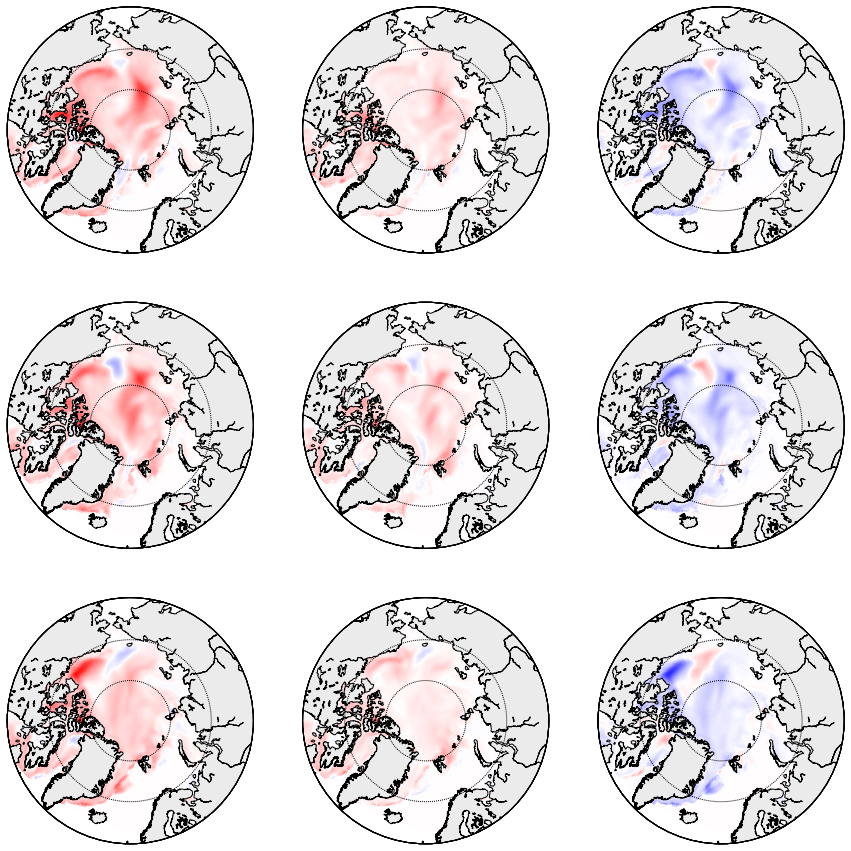

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(15,15))

years=['2007','2011','2015']
#filename = glob.glob(polzin+'avg_iicethic_y201?_m03.nc')

for axis, year in zip(axes[:],years[:]):
    sj = ma.array(nc.Dataset(stlandj+'avg_iicethic_y'+year+'_m03.nc')['iicethic'][400:,:],mask=(mask[0,400:,:]-1)*-1)
    p = ma.array(nc.Dataset(polzin+'avg_iicethic_y'+year+'_m03.nc')['iicethic'][400:,:],mask=(mask[0,400:,:]-1)*-1)
    c= ma.array(nc.Dataset(control_storage+'avg_iicethic_y'+year+'_m03.nc')['iicethic'][400:,:],mask=(mask[0,400:,:]-1)*-1)
    
#     sj = ma.array(nc.Dataset(stlandj+'avg_iicethic_y'+year+'_m10.nc')['iicethic'][400:,:],mask=(mask[0,400:,:]-1)*-1)
#     p = ma.array(nc.Dataset(polzin+'avg_iicethic_y'+year+'_m10.nc')['iicethic'][400:,:],mask=(mask[0,400:,:]-1)*-1)
#     c= ma.array(nc.Dataset(control_storage+'avg_iicethic_y'+year+'_m10.nc')['iicethic'][400:,:],mask=(mask[0,400:,:]-1)*-1)
   
    c_sj = c-sj
    c_p = c-p
    diff = sj-p
#     percent = np.divide(sj,p)
#     ratio = np.divide(diff,p)
    csj = plot_arctic(axis[0],c_sj,diffplot=True,min_log = -4, max_scale=4)
    cp = plot_arctic(axis[1],c_p,diffplot=True,min_log = -4, max_scale=4)
    diffm = plot_arctic(axis[2],diff,diffplot=True,min_log = -4, max_scale=4)
    #perm = plot_arctic(axis[3],percent,diffplot=True,log = True,min_log=0.001, max_scale=1000)
    #relative = plot_arctic(axis[4],ratio,sym = True,min_log=0.01, max_scale=1000)
    
    print('c_sj',c_sj.min(), c_sj.max())
    print('c_p', c_p.min(), c_p.max())
    print('sj-p',diff.min(),diff.max())
#icethic = nc.Dataset(control_storage+'avg_iicethic_y2002_m12.nc')

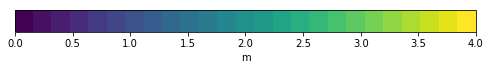

In [19]:
import matplotlib as mpl

fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_axes([0.9, 0.15, 0.8, 0.1])
norm = colors.Normalize(vmin=0,vmax=4)
# norm = colors.LogNorm(vmin=0.001,
#                                  vmax=1000)
cmap = plt.get_cmap('viridis',25)
cmap.set_bad('burlywood')

cmap.set_over(color='grey')

cb1 = mpl.colorbar.ColorbarBase(ax1,orientation='horizontal', cmap=cmap,
                                norm=norm)
cb1.set_label('m')

c_sj -0.148921263136 0.275939331479
c_p -0.0939131918019 0.189841341482
sj-p -0.188646978303 0.139173020239
c_sj -0.108100338341 0.295734674963
c_p -0.0976132907688 0.164223608089
sj-p -0.22209774468 0.0782678135454
c_sj -0.168114755252 0.330955345745
c_p -0.110322732631 0.165316925882
sj-p -0.255495558455 0.10252808953


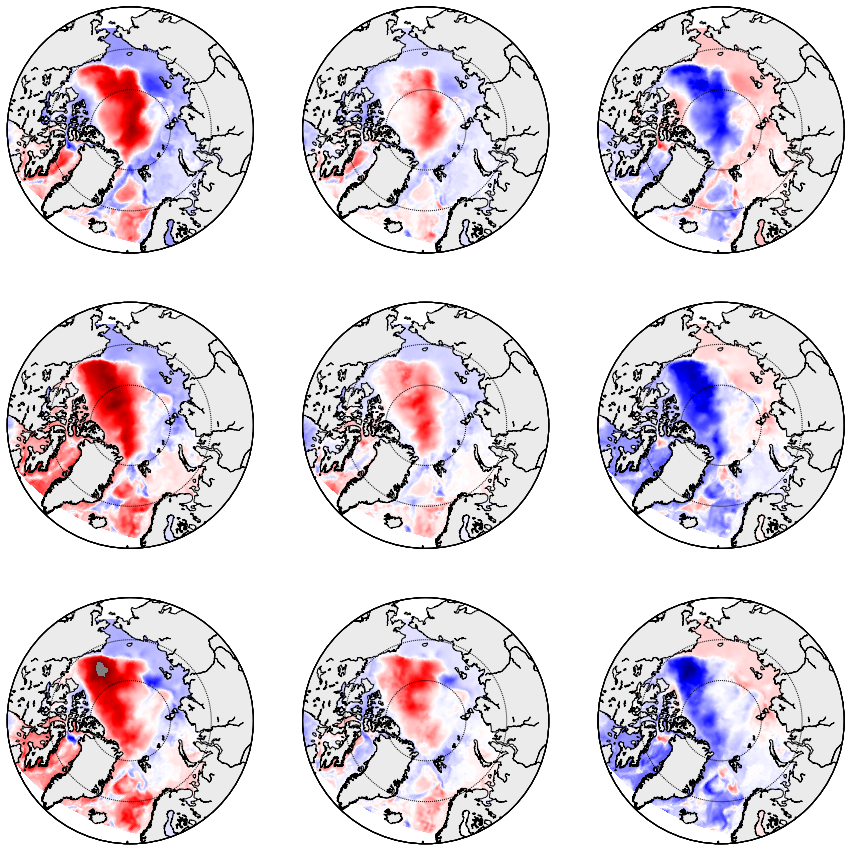

In [32]:
fig, axes = plt.subplots(3,3, figsize=(15,15))

years=['2007','2011','2015']
#filename = glob.glob(polzin+'avg_iicethic_y201?_m03.nc')

for axis, year in zip(axes[:],years[:]):
    sj = ma.array(nc.Dataset(stlandj+'avg_sossheig_y'+year+'.nc')['sossheig'][400:,:],mask=(mask[0,400:,:]-1)*-1)
    p = ma.array(nc.Dataset(polzin+'avg_sossheig_y'+year+'.nc')['sossheig'][400:,:],mask=(mask[0,400:,:]-1)*-1)
    c= ma.array(nc.Dataset(control_storage+'avg_sossheig_y'+year+'.nc')['sossheig'][400:,:],mask=(mask[0,400:,:]-1)*-1)
    
    c_sj = c-sj
    c_p = c-p
    diff = sj-p
    
    #     diff = sj-p
#     percent = np.divide(sj,p)
#     ratio = np.divide(diff,p)
    sjm = plot_arctic(axis[0],c_sj,diffplot=True,min_log = -0.3, max_scale=0.3)
    pm = plot_arctic(axis[1],c_p,diffplot=True,min_log = -0.3, max_scale=0.3)
    sjm = plot_arctic(axis[2],diff,diffplot=True,min_log = -0.3, max_scale=0.3)
    
    print('c_sj',c_sj.min(), c_sj.max())
    print('c_p', c_p.min(), c_p.max())
    print('sj-p',diff.min(),diff.max())

#     diffm = plot_arctic(axis[2],diff,diffplot=True,min_log = -2, max_scale=2)
#     perm = plot_arctic(axis[3],percent,diffplot=True,log = True,min_log=0.001, max_scale=1000)
#     relative = plot_arctic(axis[4],ratio)
#    print(percent.min(), percent.max())

In [11]:
#Now looking at 4 year averages
cont = ma.array(nc.Dataset(control_storage+'2012-2016avg_sossheig.nc').variables['sossheigfour'][300:,:],mask=(mask[0,300:,:]-1)*-1)
stlj = ma.array(nc.Dataset(stlandj+'2012-2016avg_sossheig.nc').variables['sossheigfour'][300:,:],mask=(mask[0,300:,:]-1)*-1)
polz = ma.array(nc.Dataset(polzin+'2012-2016avg_sossheig.nc').variables['sossheigfour'][300:,:],mask=(mask[0,300:,:]-1)*-1)



In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,15))

cm = plot_arctic(axes[0],cont,min_log = -1.2, max_scale=0.2)
pm = plot_arctic(axes[1],stlj,min_log = -1.2, max_scale=0.2)
sjm = plot_arctic(axes[2],polz,min_log = -1.2, max_scale=0.2)


In [13]:
cont = ma.array(nc.Dataset(control_storage+'m092012-2016avg_iicethic.nc').variables['iicethic'][300:,:],mask=(mask[0,300:,:]-1)*-1)
stlj = ma.array(nc.Dataset(stlandj+'m092012-2016avg_iicethic.nc').variables['iicethic'][300:,:],mask=(mask[0,300:,:]-1)*-1)
polz = ma.array(nc.Dataset(polzin+'m092012-2016avg_iicethic.nc').variables['iicethic'][300:,:],mask=(mask[0,300:,:]-1)*-1)


In [14]:
print(cont.max(), cont.min(), stlj.max(), stlj.min(),polz.max(), polz.min())

5.07642505566 0.0 4.28614535928 0.0 4.82042105993 0.0


In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,15))

cm = plot_arctic(axes[0],cont,min_log = 0, max_scale=4)
pm = plot_arctic(axes[1],stlj,min_log = 0, max_scale=4)
sjm = plot_arctic(axes[2],polz,min_log = 0, max_scale=4)

In [102]:
#difference plots
c_stl = cont-stlj
c_p = cont-polz
sl_p = polz-stlj

In [103]:
print(c_stl.max(), c_stl.min(), c_p.max(), c_p.min(),sl_p.max(), sl_p.min())

2.58043150038 -0.907670503948 1.85303392261 -0.559240107269 1.8765760556 -0.870489889445


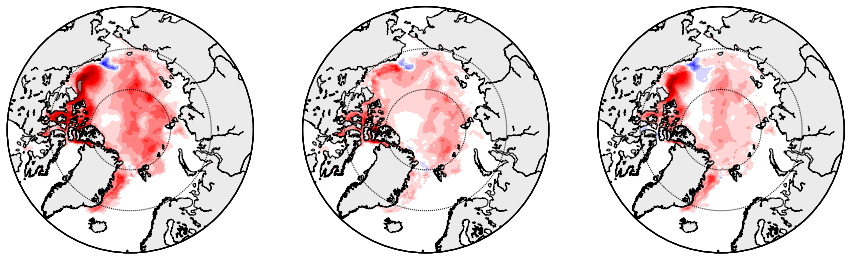

In [104]:
fig, axes = plt.subplots(1,3, figsize=(15,15))

cm = plot_arctic(axes[0],c_stl,diffplot=True,min_log = -2, max_scale=2)
pm = plot_arctic(axes[1],c_p,diffplot=True,min_log = -2, max_scale=2)
sjm = plot_arctic(axes[2],sl_p,diffplot=True,min_log = -2, max_scale=2)

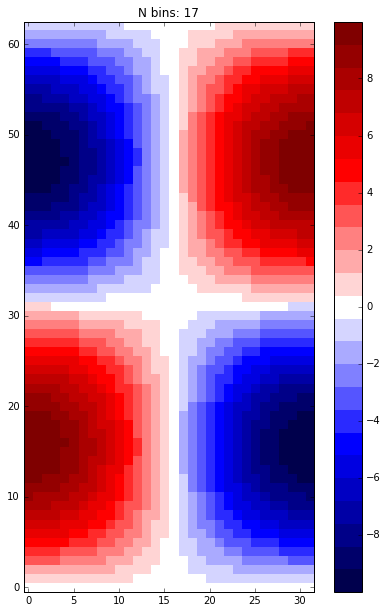

In [89]:
from matplotlib.colors import LinearSegmentedColormap
# Make some illustrative fake data:

x = np.arange(0, np.pi, 0.1)
y = np.arange(0, 2*np.pi, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.sin(Y) * 10


# --- Colormaps from a list ---

colors = [(1, 0, 0), (1, 1, 1), (0, 0, 1)]  # R -> W -> B
n_bins =  17  # Discretizes the interpolation into bins
cmap_name = 'my_list'
fig, axs = plt.subplots(1,1, figsize=(6, 9))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

cm = plt.get_cmap('seismic',25)
#LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
    # Fewer bins will result in "coarser" colomap interpolation
im = axs.imshow(Z, interpolation='nearest', origin='lower', cmap=cm)
axs.set_title("N bins: %s" % n_bins)
fig.colorbar(im, ax=axs)
